# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Introduction-to-OpenCV" data-toc-modified-id="Introduction-to-OpenCV-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction to OpenCV</a></div><div class="lev2 toc-item"><a href="#Intro-and-loading-Images" data-toc-modified-id="Intro-and-loading-Images-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Intro and loading Images</a></div><div class="lev2 toc-item"><a href="#Loading-Video-Source" data-toc-modified-id="Loading-Video-Source-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Loading Video Source</a></div><div class="lev2 toc-item"><a href="#Drawing-and-Writing-on-Image" data-toc-modified-id="Drawing-and-Writing-on-Image-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Drawing and Writing on Image</a></div><div class="lev2 toc-item"><a href="#Image-arithmetics-and-Logic" data-toc-modified-id="Image-arithmetics-and-Logic-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Image arithmetics and Logic</a></div><div class="lev2 toc-item"><a href="#Thresholding" data-toc-modified-id="Thresholding-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Thresholding</a></div><div class="lev2 toc-item"><a href="#Color-Filtering" data-toc-modified-id="Color-Filtering-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Color Filtering</a></div><div class="lev2 toc-item"><a href="#Blurring-and-Smoothing" data-toc-modified-id="Blurring-and-Smoothing-17"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Blurring and Smoothing</a></div><div class="lev2 toc-item"><a href="#Morphological-Transformations" data-toc-modified-id="Morphological-Transformations-18"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Morphological Transformations</a></div><div class="lev2 toc-item"><a href="#Edge-Detection-and-Gradients" data-toc-modified-id="Edge-Detection-and-Gradients-19"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Edge Detection and Gradients</a></div>

# Introduction to OpenCV

In [1]:
from time import sleep

import cv2
import matplotlib.pyplot as plt
import numpy as np
import signal
import sys

In [2]:
def signal_handler(signal, frame):
    # KeyboardInterrupt detected, exiting
    global is_interrupted
    is_interrupted = True

## Intro and loading Images    

In [ ]:
# ref: sentdex
# url: https://www.youtube.com/watch?v=Z78zbnLlPUA&list=PLQVvvaa0QuDdttJXlLtAJxJetJcqmqlQq

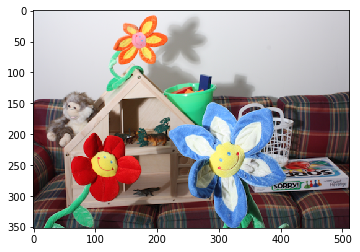

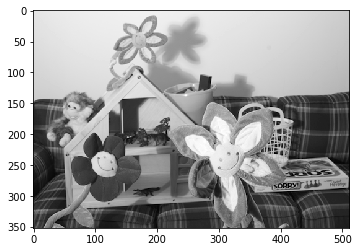

In [3]:
img = cv2.imread('flowers-left.png', cv2.IMREAD_COLOR)

# cv2.imshow('title image', img)
# cv2.destroyAllWindows()

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img_rgb, 'gnuplot2')
plt.show()

plt.imshow(img_gray, 'gray')
plt.show()

plt.close()

## Loading Video Source

In [ ]:
%matplotlib notebook
# ref: sentdex
# url: https://www.youtube.com/watch?v=Jvf5y21ZqtQ&list=PLQVvvaa0QuDdttJXlLtAJxJetJcqmqlQq&index=2

<IPython.core.display.Javascript object>


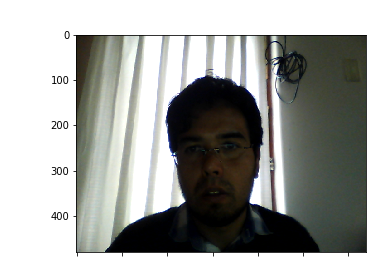

/home/xmn/anaconda3/lib/python3.6/site-packages/matplotlib/backend_bases.py:2453: MatplotlibDeprecationWarning: Using default event loop until function specific to this GUI is implemented
  warnings.warn(str, mplDeprecation)
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [26]:
vc = cv2.VideoCapture(0)

# codec
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(
    filename='out.avi', 
    fourcc=fourcc, 
    fps=8.0, 
    frameSize=(640, 480)
)

plt.ion()

if vc.isOpened(): # try to get the first frame
    is_capturing, frame = vc.read()
    # cv2.COLOR_BGR2RGB
    # makes the blues image look real colored
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    webcam_preview = plt.imshow(frame, cmap='gnuplot2')    
else:
    is_capturing = False


is_interrupted = False
signal.signal(signal.SIGINT, signal_handler)

while is_capturing:
    is_capturing, frame = vc.read()
    # makes the blues image look real colored
    # cv2.COLOR_BGR2RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    webcam_preview.set_data(frame_rgb)
    out.write(frame)
    
    plt.draw()
    
    try:
        plt.pause(0.05)
    except Exception:
        pass
    
    if is_interrupted:
        vc.release()
        out.release()
        break

plt.ioff()
plt.close()

## Drawing and Writing on Image

In [ ]:
%matplotlib inline
# ref: sentdex
# url: https://www.youtube.com/watch?v=U6uIrq2eh_o&list=PLQVvvaa0QuDdttJXlLtAJxJetJcqmqlQq&index=3

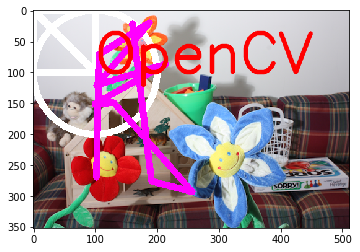

In [39]:
np.random.seed(42)
img = cv2.imread('flowers-left.png', cv2.IMREAD_COLOR)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

cv2.line(
    img=img, pt1=(0, 0), pt2=(100, 100), 
    color=(255, 255, 255), thickness=10, 
    lineType=8, shift=0
)
cv2.rectangle(
    img=img, pt1=(0, 0), pt2=(100, 100), 
    color=(255, 255, 255), thickness=10, 
    lineType=8, shift=0
)
cv2.circle(
    img=img, center=(100, 100),
    radius=100,
    color=(255, 255, 255), thickness=10, 
    lineType=8, shift=0
)

pts = np.array(
    np.random.randint(0, 300, 20)
).reshape((10, 2))

cv2.polylines(
    img=img, pts=[pts], isClosed=False,
    color=(255, 0, 255), thickness=10, 
    lineType=8, shift=0
)

font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(
    img=img,
    text='OpenCV',
    org=(100, 100),
    fontFace=font,
    fontScale=3,
    color=(255, 0, 0),
    thickness=5,
    lineType=cv2.LINE_AA,
    bottomLeftOrigin=False
)

plt.imshow(img, 'gnuplot2')
plt.show()
plt.close()

## Image arithmetics and Logic

In [60]:
%matplotlib inline
# ref: sentdex
# url: https://www.youtube.com/watch?v=_gfNpJmWIug&list=PLQVvvaa0QuDdttJXlLtAJxJetJcqmqlQq&index=5

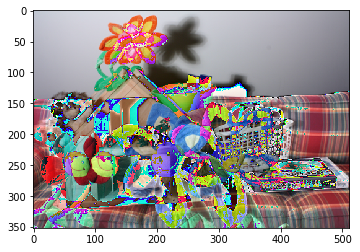

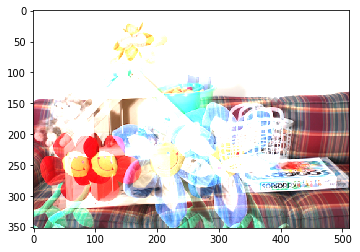

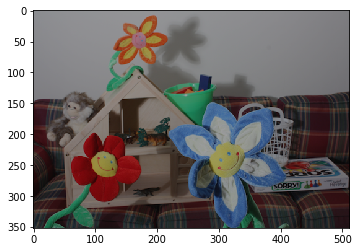

In [61]:
np.random.seed(42)

img1 = cv2.imread('flowers-left.png', cv2.IMREAD_COLOR)
img2 = cv2.imread('flowers-right.png', cv2.IMREAD_COLOR)

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.imshow(img1 + img2, 'gnuplot2')
plt.show()

plt.imshow(cv2.add(img1, img2), 'gnuplot2')
plt.show()

imgw = cv2.addWeighted(img1, 0.6, img2, 0,4, 0)
plt.imshow(imgw, 'gnuplot2')
plt.show()

roi


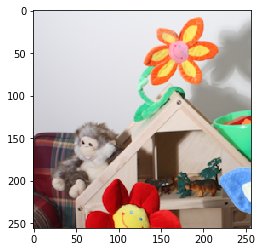

mask


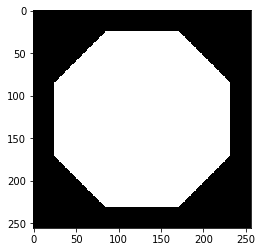

img1_bg


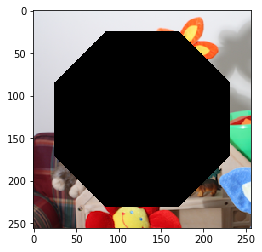

img2_fg


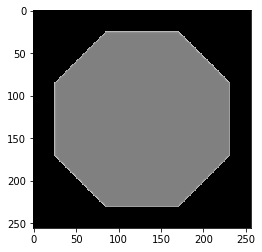

new_img


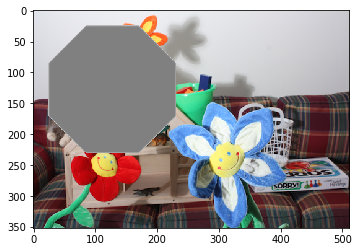

In [67]:
img1 = cv2.imread('flowers-left.png', cv2.IMREAD_COLOR)
img2 = cv2.imread('octagon.png', cv2.IMREAD_COLOR)

img1 = cv2.cvtColor(src=img1, code=cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(src=img2, code=cv2.COLOR_BGR2RGB)

# roi = subsection of img1 with shape equal to img2
rows, cols, channels = img2.shape
roi = img1[:rows, :cols]

print('roi')
plt.imshow(roi, 'gnuplot2')
plt.show()

# create a mask with img2
img2gray = cv2.cvtColor(src=img2, code=cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(
    src=img2gray, thresh=200, maxval=255, 
    type=cv2.THRESH_BINARY_INV
)

print('mask')
plt.imshow(mask, 'gnuplot2')
plt.show()

# invert mask
mask_inv = cv2.bitwise_not(src=mask)

# copy data contained in the mask_inv area 
# (background of img2) on img1
img1_bg = cv2.bitwise_and(src1=roi, src2=roi, mask=mask_inv)
# copy data contained in the mask area on img2 (with no background)
img2_fg = cv2.bitwise_and(src1=img2, src2=img2, mask=mask)

print('img1_bg')
plt.imshow(img1_bg, 'gnuplot2')
plt.show()

print('img2_fg')
plt.imshow(img2_fg, 'gnuplot2')
plt.show()

# joins img1_bg and img2_fg
dst = cv2.add(src1=img1_bg, src2=img2_fg)

# updates img1
img = img1.copy()
img[:rows, :cols] = dst

print('new_img')
plt.imshow(img, 'gnuplot2')
plt.show()

plt.close()

## Thresholding

In [68]:
%matplotlib inline
# ref: sentdex
# url: https://www.youtube.com/watch?v=jXzkxsT9gxM&index=6&list=PLQVvvaa0QuDdttJXlLtAJxJetJcqmqlQq

original


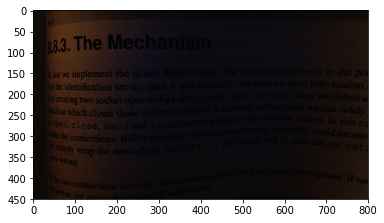

grayscaled


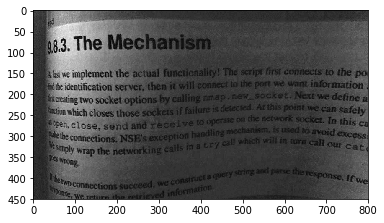

threshold


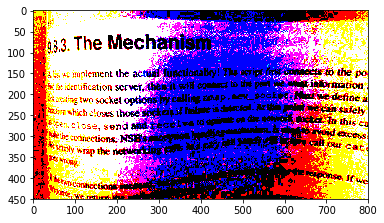

grayscaled binary threshold


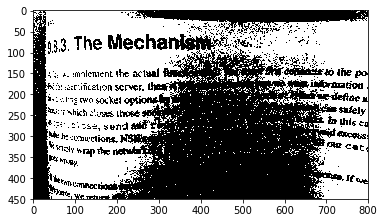

grayscaled otsu threshold


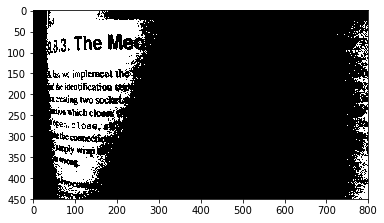

grayscaled gaussian threshold


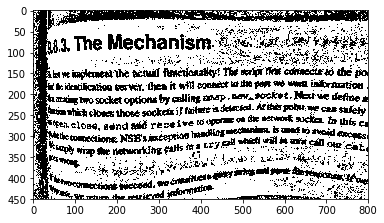

In [90]:
img = cv2.imread(filename='bookpage.jpg', flags=cv2.IMREAD_COLOR)
img = cv2.cvtColor(src=img, code=cv2.COLOR_BGR2RGB)

grayscaled = cv2.cvtColor(src=img, code=cv2.COLOR_BGR2GRAY)

retval, threshold = cv2.threshold(
    src=img, thresh=12, maxval=255, 
    type=cv2.THRESH_BINARY
)

retval, gray_binary_threshold = cv2.threshold(
    src=grayscaled, thresh=12, maxval=255, 
    type=cv2.THRESH_BINARY
)

retval, gray_otsu_threshold = cv2.threshold(
    src=grayscaled, thresh=152, maxval=255, 
    type=cv2.THRESH_OTSU
)

gaus = cv2.adaptiveThreshold(
    src=grayscaled, maxValue=255, 
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    thresholdType=cv2.THRESH_BINARY, 
    blockSize=115, C=1
)

print('original')
plt.imshow(X=img, cmap='gnuplot2')
plt.show()

print('grayscaled')
plt.imshow(X=grayscaled, cmap='gray')
plt.show()

print('threshold')
plt.imshow(X=threshold, cmap='gnuplot2')
plt.show()

print('grayscaled binary threshold')
plt.imshow(X=gray_binary_threshold, cmap='gray')
plt.show()

print('grayscaled otsu threshold')
plt.imshow(X=gray_otsu_threshold, cmap='gray')
plt.show()

print('grayscaled gaussian threshold')
plt.imshow(X=gaus, cmap='gray')
plt.show()

plt.close()

## Color Filtering

In [92]:
%matplotlib notebook
# ref: sentdex
# url: https://www.youtube.com/watch?v=CCOXg75HkvM&index=7&list=PLQVvvaa0QuDdttJXlLtAJxJetJcqmqlQq

<IPython.core.display.Javascript object>


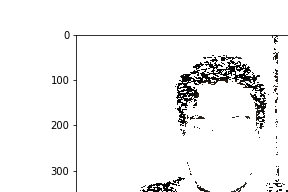

/home/xmn/anaconda3/lib/python3.6/site-packages/matplotlib/backend_bases.py:2453: MatplotlibDeprecationWarning: Using default event loop until function specific to this GUI is implemented
  warnings.warn(str, mplDeprecation)


In [101]:
vc = cv2.VideoCapture(0)

plt.ion()

if vc.isOpened(): # try to get the first frame
    is_capturing, frame = vc.read()
    # cv2.COLOR_BGR2RGB
    # makes the blues image look real colored
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    webcam_preview = plt.imshow(frame, cmap='gnuplot2')    
else:
    is_capturing = False

is_interrupted = False
signal.signal(signal.SIGINT, signal_handler)

lower_red = np.uint8([0, 0, 0])
upper_red = np.uint8([80, 155, 55])

while is_capturing:
    is_capturing, frame = vc.read()
    # makes the blues image look real colored
    # cv2.COLOR_BGR2RGB
    frame_hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    mask = cv2.inRange(src=frame_hsv, lowerb=lower_red, upperb=upper_red)
    frame_res = cv2.bitwise_and(src1=frame, src2=frame, mask=mask)
    frame_rgb = cv2.cvtColor(frame_res, cv2.COLOR_BGR2RGB)
    
    # background equal to white
    frame_rgb[frame_rgb==0] = 255
    
    webcam_preview.set_data(A=frame_rgb)
    
    plt.draw()
    
    try:
        plt.pause(0.05)
    except Exception:
        pass
    
    if is_interrupted:
        vc.release()
        break

plt.ioff()
plt.close()

## Blurring and Smoothing

In [12]:
%matplotlib inline
# ref: sentdex
# url: https://www.youtube.com/watch?v=sARklx6sgDk&list=PLQVvvaa0QuDdttJXlLtAJxJetJcqmqlQq&index=8

original image


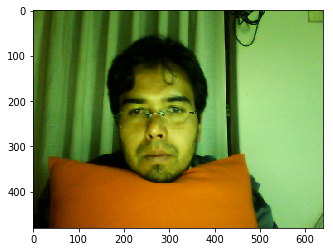

masked image


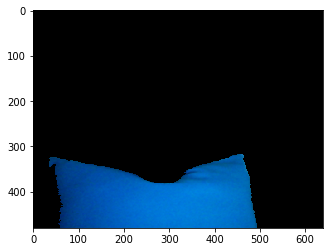

simple filter image


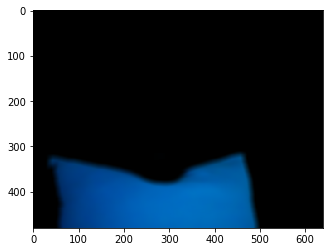

gaussian filter image


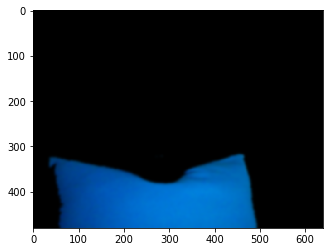

median filter image


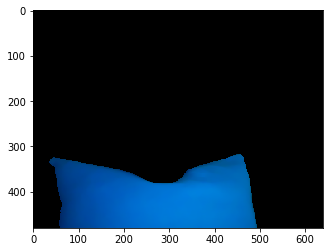

bilateral filter image


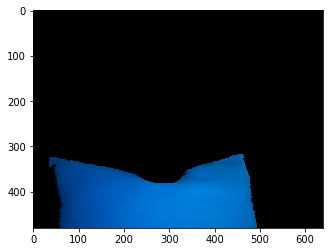

In [28]:
vc = cv2.VideoCapture(0)

if vc.isOpened(): # try to get the first frame
    _, frame = vc.read()
    # cv2.COLOR_BGR2RGB
    # makes the blues image look real colored
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    print('original image')
    plt.imshow(X=frame, cmap='gnuplot2')    
    plt.show()

    print('masked image')
    lower_red = np.uint8([100, 50, 100])
    upper_red = np.uint8([200, 255, 255])

    # makes the blues image look real colored
    # cv2.COLOR_BGR2RGB
    frame_hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    mask = cv2.inRange(src=frame_hsv, lowerb=lower_red, upperb=upper_red)
    
    frame_color_filtered = cv2.bitwise_and(src1=frame, src2=frame, mask=mask)
    frame_cf_rgb = cv2.cvtColor(frame_color_filtered, cv2.COLOR_BGR2RGB)
    plt.imshow(X=frame_cf_rgb, cmap='gnuplot2')    
    plt.show()
    
    # background equal to white
    # frame_cf_rgb[frame_cf_rgb==0] = 255
    
    print('simple filter image')
    simple_kernel = np.ones((15, 15), dtype=np.float32)/255
    frame_smoothed = cv2.filter2D(
        src=frame_cf_rgb, ddepth=-1, kernel=simple_kernel
    )
    plt.imshow(X=frame_smoothed, cmap='gnuplot2')    
    plt.show()
    
    print('gaussian filter image')
    gaus_blur = cv2.GaussianBlur(src=frame_cf_rgb, ksize=(15, 15), sigmaX=0)
    plt.imshow(X=gaus_blur, cmap='gnuplot2')    
    plt.show()
    
    print('median filter image')
    median_blur = cv2.medianBlur(src=frame_cf_rgb, ksize=15)
    plt.imshow(X=median_blur, cmap='gnuplot2')    
    plt.show()
    
    print('bilateral filter image')
    bilateral_blur = cv2.bilateralFilter(
        src=frame_cf_rgb, d=15, sigmaColor=75, sigmaSpace=75
    )
    plt.imshow(X=bilateral_blur, cmap='gnuplot2')    
    plt.show()
    
    
vc.release()

plt.close()

## Morphological Transformations

In [30]:
%matplotlib inline
# ref: sentdex
# url: https://www.youtube.com/watch?v=sARklx6sgDk&list=PLQVvvaa0QuDdttJXlLtAJxJetJcqmqlQq&index=8

original image


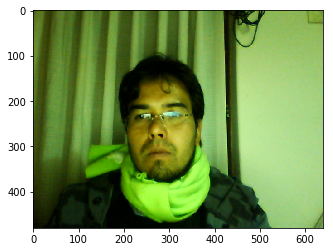

masked image


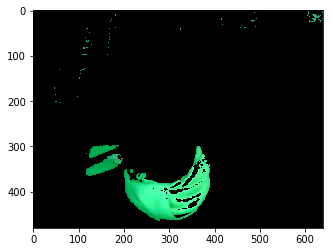

erosion transformation


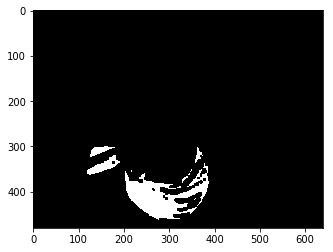

dilation transformation


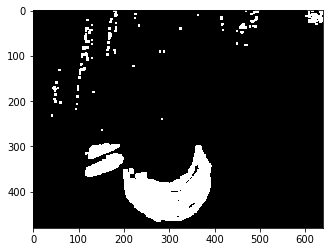

opening transformation


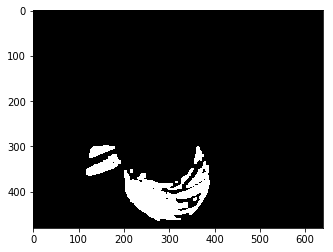

closing transformation


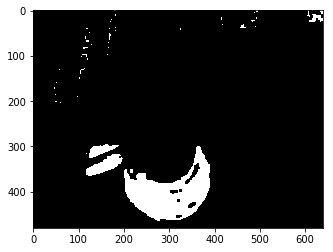

In [49]:
vc = cv2.VideoCapture(0)

if vc.isOpened(): # try to get the first frame
    _, frame = vc.read()
    # cv2.COLOR_BGR2RGB
    # makes the blues image look real colored
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    print('original image')
    plt.imshow(X=frame, cmap='gnuplot2')    
    plt.show()

    print('masked image')
    lower_red = np.uint8([0, 170, 150])
    upper_red = np.uint8([80, 255, 255])

    # makes the blues image look real colored
    # cv2.COLOR_BGR2RGB
    frame_hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    mask = cv2.inRange(src=frame_hsv, lowerb=lower_red, upperb=upper_red)
    
    frame_color_filtered = cv2.bitwise_and(src1=frame, src2=frame, mask=mask)
    frame_cf_rgb = cv2.cvtColor(frame_color_filtered, cv2.COLOR_BGR2RGB)

    plt.imshow(X=frame_cf_rgb, cmap='gnuplot2')    
    plt.show()
    
    kernel = np.ones(shape=(5, 5), dtype=np.uint8)
    
    print('erosion transformation')    
    erosion = cv2.erode(src=mask, kernel=kernel, iterations=1)
    plt.imshow(X=erosion, cmap='gnuplot2')    
    plt.show()
    
    print('dilation transformation')
    dilation = cv2.dilate(src=mask, kernel=kernel, iterations=1)
    plt.imshow(X=dilation, cmap='gnuplot2')    
    plt.show()
    
    print('opening transformation')
    opening = cv2.morphologyEx(src=mask, op=cv2.MORPH_OPEN, kernel=kernel)
    plt.imshow(X=opening, cmap='gnuplot2')    
    plt.show()
    
    print('closing transformation')
    closing = cv2.morphologyEx(src=mask, op=cv2.MORPH_CLOSE, kernel=kernel)
    plt.imshow(X=closing, cmap='gnuplot2')    
    plt.show()
    
    
vc.release()

plt.close()

## Edge Detection and Gradients

In [50]:
%matplotlib inline
# ref: sentdex
# url: https://www.youtube.com/watch?v=CJMCoAsK-h0&list=PLQVvvaa0QuDdttJXlLtAJxJetJcqmqlQq&index=10

original image


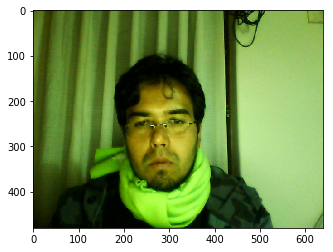

In [51]:
vc = cv2.VideoCapture(0)

if vc.isOpened(): # try to get the first frame
    _, frame = vc.read()
    # cv2.COLOR_BGR2RGB
    # makes the blues image look real colored
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    print('original image')
    plt.imshow(X=frame, cmap='gnuplot2')    
    plt.show()
    
vc.release()

plt.close()